In [1]:
######################################
#  Análisis de Sentimiento usando R
# ####################################

#library(rtweet)
#library(httr)
#library(tidyverse)

# Install : 
# conda install -c r r
# conda install -c r r-tm
# conda install -c r-essentials
# conda install -c conda-forge r-rtweet
# conda install -c r r-snowballc
# conda install -c r r-tm
# conda install -c conda-forge r-syuzhet

# Carga de librerias
library(SnowballC)
library(tm)
library(syuzhet)
library(dplyr)
library(data.table)

# libreria de gráficos
library(ggplot2)

Loading required package: NLP

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



In [2]:
##################################
##     Obtención de datos
##################################

# Rutas de los archivos

FILE_ENCONDING <- "ISO-8859-1"
FILE_URL_1 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad.csv"
FILE_URL_2 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad-13122018.csv"
FILE_URL_3 <- "D:\\personal\\Maestria\\Tesis\\Datos\\Lima\\resultados-lima-navidad-20122018.csv"

# Lectura de tweets
Navidad.1.tweets <- read.csv(FILE_URL_1, fileEncoding = FILE_ENCONDING )
Navidad.2.tweets <- read.csv(FILE_URL_2, fileEncoding = FILE_ENCONDING )
Navidad.3.tweets <- read.csv(FILE_URL_3, fileEncoding = FILE_ENCONDING )


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [3]:
# Unificando dataframe
Navidad.tweets <- rbind(Navidad.1.tweets , Navidad.2.tweets , Navidad.3.tweets)
# Columnas de los tweet
colnames(Navidad.tweets)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "hashtags"                "symbols"                
[17] "urls_url"                "urls_t.co"              
[19] "urls_expanded_url"       "media_url"              
[21] "media_t.co"              "media_expanded_url"     
[23] "media_type"              "ext_media_url"          
[25] "ext_media_t.co"          "ext_media_expanded_url" 
[27] "ext_media_type"          "mentions_user_id"       
[29] "mentions_screen_name"    "lang"                   
[31] "quoted_status_id"        "quoted_text"            
[33] "quoted_created_at"       "quoted_source"          
[35] "quoted_favorite_count"   "quoted_retweet_count"   
[37] "quoted_user_id"          "quoted_screen_name"     
[39] "quoted_name"             "quoted_followers_count" 
[41] "quoted_friends_count"    "quoted_statuses_count"  
[43] "quoted_location"         "quoted_description"     
[45] "quoted_verified"         "retweet_status_id"      
[47] "retweet_text"            "retweet_created_at"     
[49] "retweet_source"          "retweet_favorite_count" 
[51] "retweet_retweet_count"   "retweet_user_id"        
[53] "retweet_screen_name"     "retweet_name"           
[55] "retweet_followers_count" "retweet_friends_count"  
[57] "retweet_statuses_count"  "retweet_location"       
[59] "retweet_description"     "retweet_verified"       
[61] "place_url"               "place_name"             
[63] "place_full_name"         "place_type"             
[65] "country"                 "country_code"           
[67] "geo_coords"              "coords_coords"          
[69] "bbox_coords"             "status_url"             
[71] "name"                    "location"               
[73] "description"             "url"                    
[75] "protected"               "followers_count"        
[77] "friends_count"           "listed_count"           
[79] "statuses_count"          "favourites_count"       
[81] "account_created_at"      "verified"               
[83] "profile_url"             "profile_expanded_url"   
[85] "account_lang"            "profile_banner_url"     
[87] "profile_background_url"  "profile_image_url"      
[89] "LIMA"

In [4]:
# Primeros tweet
head(Navidad.tweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,LIMA
x1007016869700644865,x1069449920980152320,2018-12-03 04:35:05,DebnamCareyR,EMPEZÓ EL MES DE LA NAVIDAD https://t.co/9lySU7ZGv6,Twitter Web Client,69,,,,,388,2018-06-13 21:48:25,FALSE,,,es,https://pbs.twimg.com/profile_banners/1007016869700644865/1542171499,,http://pbs.twimg.com/profile_images/1062229194539708416/0OLNOZsD_normal.jpg,MODERNA
x291533196,x1069449812783898626,2018-12-03 04:34:39,FrEliasosa,@carmen_ramos_o La Navidad es Jesús.,Twitter for iPhone,20,x1069414470320103424,x183044285,carmen_ramos_o,,3619,2011-05-02 05:18:26,FALSE,https://t.co/pPdjEZUwuQ,http://www.sanagustin.edu.pe,es,https://pbs.twimg.com/profile_banners/291533196/1471074241,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/766876277546549252/uZ2MbWpW_normal.jpg,MODERNA
x461766479,x1069449721914187777,2018-12-03 04:34:17,CarlosMaldo96,"comprar mini árboles de Navidad a 2 soles, entre otras formas de gastar dinero porque ofertas navideña",Twitter Web Client,102,,,,,12668,2012-01-12 05:01:15,FALSE,,,es,https://pbs.twimg.com/profile_banners/461766479/1503477432,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/903094092770545665/YIwFgUwT_normal.jpg,MODERNA
x461766479,x1066952385283661824,2018-11-26 07:10:46,CarlosMaldo96,Un mes para Navidad https://t.co/S6fbPQb8oC,Twitter Web Client,43,,,,,12668,2012-01-12 05:01:15,FALSE,,,es,https://pbs.twimg.com/profile_banners/461766479/1503477432,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/903094092770545665/YIwFgUwT_normal.jpg,MODERNA
x883716556601126913,x1069449716910428160,2018-12-03 04:34:16,CarneroErick,"@KeikoFujimori @KeikoFujimori SI DE VERDAD QUIERE HACER UN ACTO DE BONDAD POR NAVIDAD, AYUDENOS A LOS CAS MEDIANTE SU PARTIDO, MILES DE FAMILIAS PERUANAS SE LO AGRADECEREMOS, POR FAVOR. @CasNacional @CarneroErick @CasCoordinador @unidad_cas <U+270A><f0><U+009F><U+008F><U+00BD> https://t.co/xTyWffDf9Y",Twitter for Android,140,,,,,1936,2017-07-08 15:57:00,FALSE,,,es,https://pbs.twimg.com/profile_banners/883716556601126913/1537965013,,http://pbs.twimg.com/profile_images/1047486940994568192/vWZtDfzF_normal.jpg,MODERNA
x1383338288,x1069449023902400512,2018-12-03 04:31:31,revistalamolina,"Hoy comienza el adviento. Tiempo de reflexión, cambio y buen entendimiento con los demás, mientras llega la Navidad.",Facebook,116,,,,,0,2013-04-27 02:11:35,FALSE,,,es,https://pbs.twimg.com/profile_banners/1383338288/1367859983,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/3628725066/cb33c7debb71738617c005e666ba5db4_normal.jpeg,MODERNA


In [5]:
# Convertir a minusculas
Navidad.tweets$text <- tolower(Navidad.tweets$text)

In [6]:
# Filtrar tweets que relacione tiendas comerciales de Lima con las palabras raices de compr y regal
Navidad.tweets <- filter(Navidad.tweets,
                             (   text %like% "gamarra" 
                               | text %like% "sagafalabella" | text %like% "saga"
                               | text %like% "oechsle"
                               | text %like% "ripley"
                             ) 
                             &
                             (   text %like% "compr"   # COMPRAR
                               | text %like% "regal"   # REGALAR
                             ) 
                            ) # fin de filter
# Mostrar tweets filtrados
head(Navidad.tweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,LIMA
x290346771,x1069411076050046976,2018-12-03 02:00:43,AlinMadnessland,"@ranitachina yo me compré una hace años en gamarra, me duró un montón. el material era como de franela, pero deben tener más delgados.",Twitter for Android,121,x1069410628090109952,x22200291,ranitachina,,38394,2011-04-30 04:06:19,FALSE,https://t.co/tAT4HXAaWR,http://ask.fm/AlinMadnessland,es,https://pbs.twimg.com/profile_banners/290346771/1408848444,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1028814457651298306/5xMUZYP-_normal.jpg,MODERNA
x1164666276,x1066906561866543109,2018-11-26 04:08:41,monokonplatillo,#deseopanavidad ir a gamarra a comprar juguetes xq estoy chihuán pa ir a ripley o saga.,Twitter for Android,87,,,,,18202,2013-02-10 02:18:27,FALSE,https://t.co/opMsAqCjhp,http://www.instagram.com/cris30cordeiro,es,https://pbs.twimg.com/profile_banners/1164666276/1537820732,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1053299321632907264/mFx8yDxb_normal.jpg,MODERNA
x222132574,x1068148923833991169,2018-11-29 14:25:23,Iraqundo,"@micky79_ @casanismo ya te dijeron que tienes severo déficit de comprensión lectora. no, el punto es que te tragas entero el cuentazo que los gamarra brescia eran pobres y desamparados cuando bien que vivieron del dinero sucio del fujimontesinismo del cual su hija despotrica.",Twitter Web Client,255,x1068146998933520384,x624170762,micky79_,,6330,2010-12-02 15:10:12,FALSE,http://t.co/1QGB4axJsN,http://inpe.gob.pe/iraqundo,es,https://pbs.twimg.com/profile_banners/222132574/1522188343,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/793256150150029316/nZNdHJ3V_normal.jpg,MODERNA
x108215781,x1069261307302608897,2018-12-02 16:05:36,anarazab,"@sagafalabella @sagafalabella buenas tardes, su web no me permite grabar ni comprar con diners club, tanto con diners y saga me sale el siguiente mensaje. ¿cuál es el problema?. https://t.co/najr3pisbh",Twitter for Android,177,,x902005135995494400,SagaFalabella,,102,2010-01-25 06:33:51,FALSE,,,es,https://pbs.twimg.com/profile_banners/108215781/1537733992,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/799326175487283201/qNoBLz98_normal.jpg,MODERNA
x2344571994,x1069079020044804096,2018-12-02 04:01:15,BruHornaFCO,"continuamos con los descuentos en nuestras tiendas con vestidos desde 20 soles y rebajas hasta el 50%. te esperamos en plaza norte, mall aventura santa anita, jesús maría y para compras por mayor en gamarra. https://t.co/zdwtqllt2y",Twitter for iPhone,140,,,,,349,2014-02-15 05:01:20,FALSE,,,es,https://pbs.twimg.com/profile_banners/2344571994/1456674528,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/971112533082935297/tP7F4pkz_normal.jpg,MODERNA
x3399428523,x1067075107741405186,2018-11-26 15:18:25,irwinftespos,"vamos a hacer intercambio de regalos y mi amiga está pidiendo que le regalen un pantalón de gamarra, prioridades.",Twitter for Android,113,,,,,28242,2015-08-02 01:07:48,FALSE,https://t.co/gmc62dIYe2,https://curiouscat.me/irwinftespos,es,https://pbs.twimg.com/profile_banners/3399428523/1542847600,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1065406001040580619/GT0PI3fb_normal.jpg,MODERNA


In [7]:
##################################
##     Limpieza de datos
##################################

# Eliminado los links en los Navidad.tweets
Navidad.tweets$text2 <- gsub("http.*","",Navidad.tweets$text)
Navidad.tweets$text2 <- gsub("https.*","",Navidad.tweets$text2)

# Eliminando  los hashtags y usuarios en los Navidad.tweets
Navidad.tweets$text2 <- gsub("#\\w+","",Navidad.tweets$text2)
Navidad.tweets$text2 <- gsub("@\\w+","",Navidad.tweets$text2)

# Eliminado los signos de puntuación, números y textos con números
Navidad.tweets$text2 <- gsub("[[:punct:]]","",Navidad.tweets$text2)
Navidad.tweets$text2 <- gsub("\\w*[0-9]+\\w*\\s*", "",Navidad.tweets$text2)

# Mostrar tweets limpieados
head(Navidad.tweets$text2)

[1] " yo me compré una hace años en gamarra me duró un montón el material era como de franela pero deben tener más delgados"                                                                                                                                        
[2] " ir a gamarra a comprar juguetes xq estoy chihuán pa ir a ripley o saga"                                                                                                                                                                                       
[3] "  ya te dijeron que tienes severo déficit de comprensión lectora no el punto es que te tragas entero el cuentazo que los gamarra brescia eran pobres y desamparados cuando bien que vivieron del dinero sucio del fujimontesinismo del cual su hija despotrica"
[4] "  buenas tardes su web no me permite grabar ni comprar con diners club tanto con diners y saga me sale el siguiente mensaje cuál es el problema "                                                                                                              
[5] "continuamos con los descuentos en nuestras tiendas con vestidos desde soles y rebajas hasta el te esperamos en plaza norte mall aventura santa anita jesús maría y para compras por mayor en gamarra "                                                         
[6] "vamos a hacer intercambio de regalos y mi amiga está pidiendo que le regalen un pantalón de gamarra prioridades"

In [8]:
##################################
##     Análisis de Sentimiento
##################################

palabra <- as.vector(Navidad.tweets$text2)

emocion <- get_nrc_sentiment(char_v = palabra, language = "spanish")

emocion2 <- cbind("text" = Navidad.tweets$text2, emocion)

head(emocion2)

text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
yo me compré una hace años en gamarra me duró un montón el material era como de franela pero deben tener más delgados,0,0,0,0,0,0,0,0,0,0
ir a gamarra a comprar juguetes xq estoy chihuán pa ir a ripley o saga,0,0,0,0,0,0,0,0,0,0
ya te dijeron que tienes severo déficit de comprensión lectora no el punto es que te tragas entero el cuentazo que los gamarra brescia eran pobres y desamparados cuando bien que vivieron del dinero sucio del fujimontesinismo del cual su hija despotrica,2,2,2,1,2,1,1,1,2,2
buenas tardes su web no me permite grabar ni comprar con diners club tanto con diners y saga me sale el siguiente mensaje cuál es el problema,0,0,0,1,0,1,0,0,1,0
continuamos con los descuentos en nuestras tiendas con vestidos desde soles y rebajas hasta el te esperamos en plaza norte mall aventura santa anita jesús maría y para compras por mayor en gamarra,0,1,0,0,1,0,1,1,1,4
vamos a hacer intercambio de regalos y mi amiga está pidiendo que le regalen un pantalón de gamarra prioridades,0,0,0,0,0,0,0,1,0,2


In [9]:
##################################
##     Cuantificación de un 
##    dataframe de emociones
##################################

# Empezamos transponiendo emocion.df
emocion.resumen <- data.frame(t(emocion))

# Suma de puntajes por emocion
emocion.resumen <- data.frame(rowSums(emocion.resumen))

# Columa de conteo de totales
names(emocion.resumen)[1] <- "total"

# Agregamos columna de emociones
emocion.resumen <- cbind("sentimiento" = rownames(emocion.resumen), emocion.resumen)

# Eliminamos el nombre de las filas
rownames(emocion.resumen) <- NULL

# Mostrar resumen de emociones
print(emocion.resumen)

    sentimiento total
1         anger    64
2  anticipation   229
3       disgust    58
4          fear    69
5           joy   162
6       sadness   406
7      surprise   136
8         trust   234
9      negative   832
10     positive   342


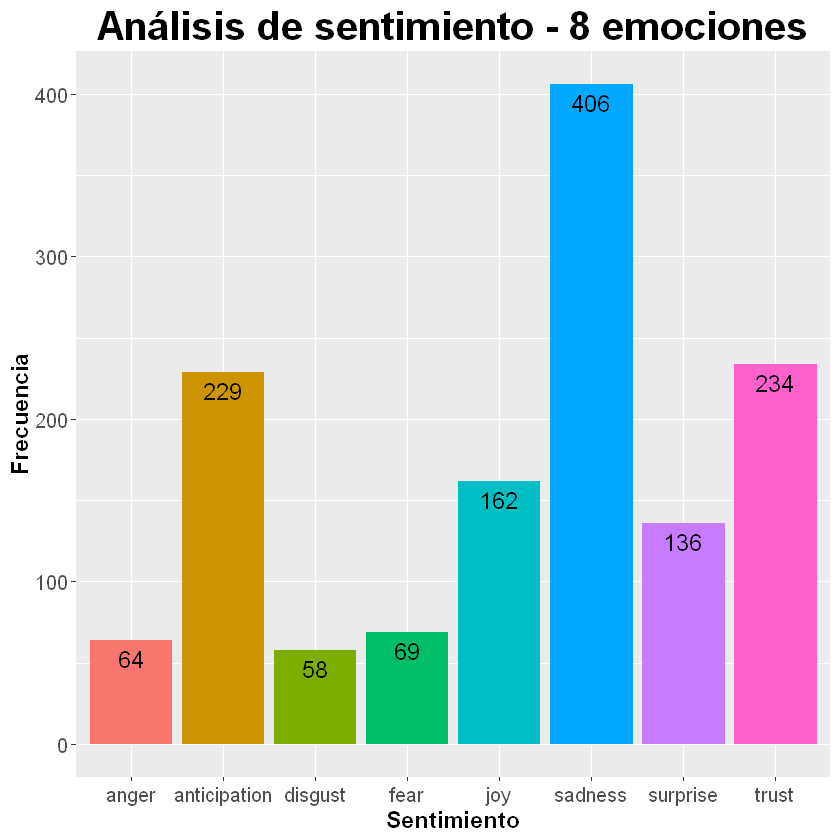

In [10]:
# Gráfico de emociones

emociones.grafico <- ggplot(emocion.resumen[1:8,], 
                               aes(x = sentimiento, y = total, fill = sentimiento)) + 
                        geom_bar(stat = "identity") + 
                        labs(title = "Análisis de sentimiento - 8 emociones", x = "Sentimiento", y = "Frecuencia") +
                        geom_text(aes(label = total), vjust = 1.5, color = "black", size = 5) +
                        theme(plot.title = element_text(hjust = 0.5),
                              axis.text = element_text(size=12),
                              axis.title = element_text(size=14,face = "bold"),
                              title = element_text(size=20,face = "bold"),
                              legend.position = "none")

print(emociones.grafico)

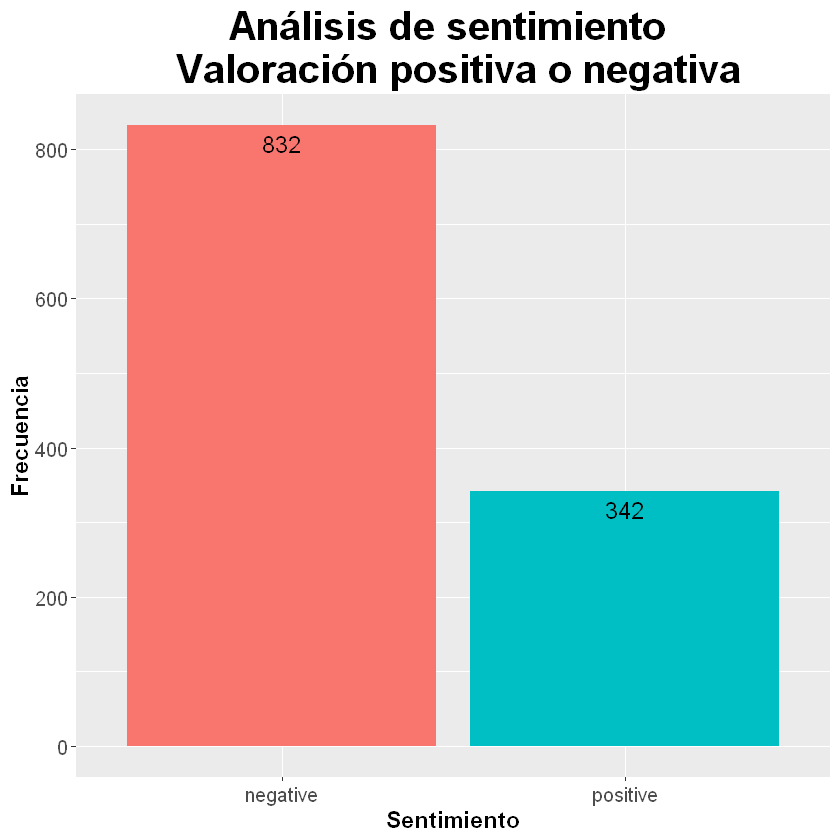

In [11]:
# Gráfico de valoraciones positivas y negativas

valoracion.grafico <- ggplot(emocion.resumen[9:10,], 
                               aes(x = sentimiento, y = total, fill = sentimiento)) + 
                        geom_bar(stat = "identity") + 
                        labs(title = "Análisis de sentimiento \n Valoración positiva o negativa", x = "Sentimiento", y = "Frecuencia") +
                        geom_text(aes(label = total), vjust = 1.5, color = "black", size = 5) +
                        theme(plot.title = element_text(hjust = 0.5),
                              axis.text = element_text(size=12),
                              axis.title = element_text(size=14,face = "bold"),
                              title = element_text(size=20,face = "bold"),
                              legend.position = "none")

print(valoracion.grafico)